In [1]:
import cv2
import cvzone
import numpy as np
import matplotlib.pyplot as plt

we load the 3 grayscale images

In [2]:
blue = cv2.imread("13550-ImageSet\JNCE_2022229_44C00038_V01-blue.png", 0)
green = cv2.imread("13550-ImageSet\JNCE_2022229_44C00038_V01-green.png", 0)
red = cv2.imread("13550-ImageSet\JNCE_2022229_44C00038_V01-red.png", 0)

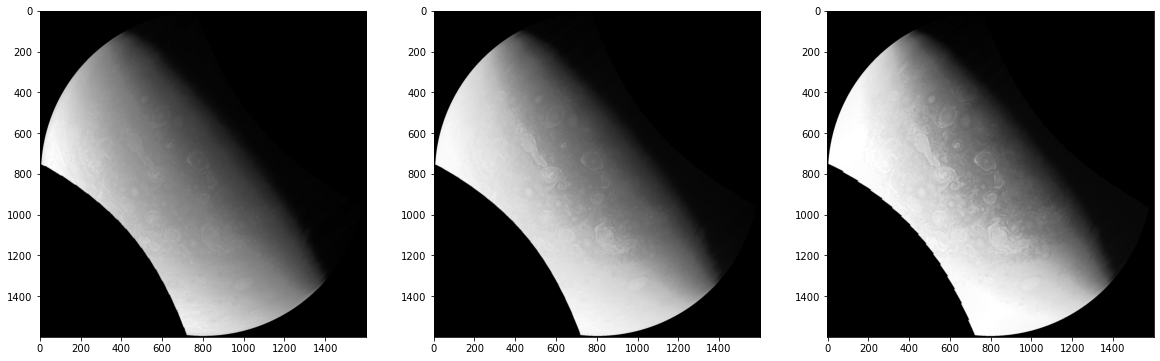

In [3]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.imshow(blue, 'gray')

plt.subplot(1,3,2)
plt.imshow(green, 'gray')


plt.subplot(1,3,3)
plt.imshow(red, 'gray')

we join the 3 images together to convert it to an RGB color image

uint8


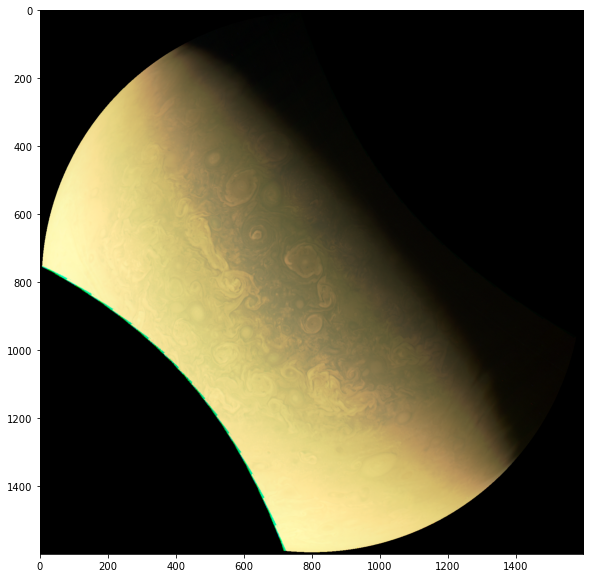

In [4]:
reconstructed = cv2.merge([blue, green, red])
img1 = cv2.cvtColor(reconstructed, cv2.COLOR_BGR2RGB)
img1_gray = cv2.cvtColor(reconstructed, cv2.COLOR_RGB2GRAY)
print(img1.dtype)
plt.figure(figsize=(20,10))
plt.imshow(img1)

white balance the RGB image

(1600, 1600, 3)
uint8


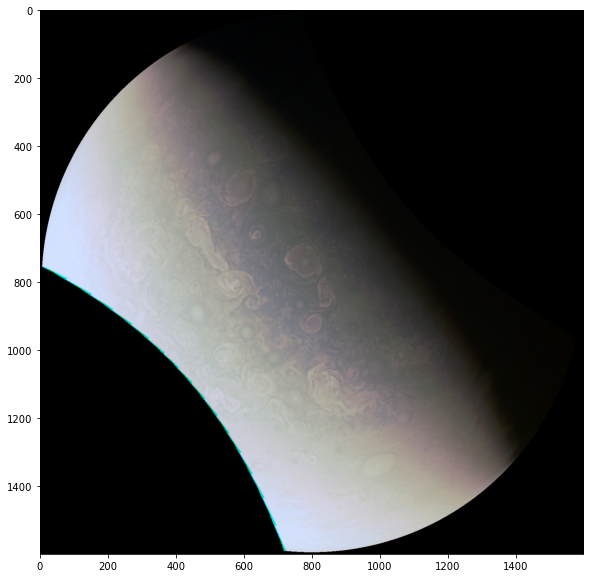

In [6]:
img_gw = ((img1 * (img1.mean() / img1.mean(axis=(0, 1)))).clip(0, 255).astype(int))
img_gw = np.uint8(img_gw)
print(img_gw.shape)
print(img_gw.dtype)
plt.figure(figsize=(20,10))
plt.imshow(img_gw)

we use adaptive histogram equalization (CLAHE)

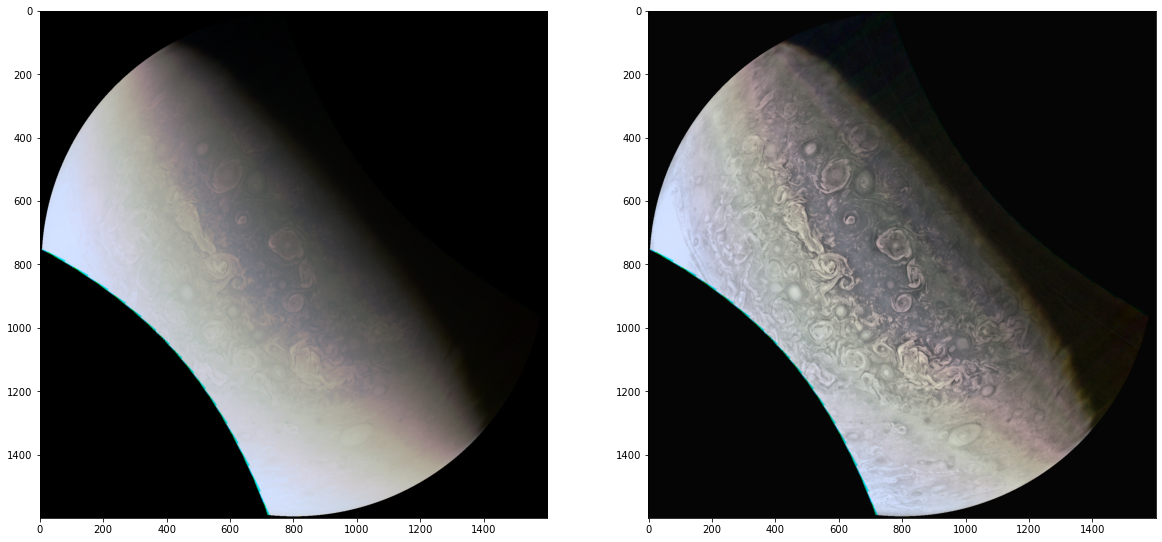

In [7]:
hsv_img = cv2.cvtColor(img_gw, cv2.COLOR_RGB2HSV)
h, s, v = hsv_img[:,:,0], hsv_img[:,:,1], hsv_img[:,:,2]

clahe = cv2.createCLAHE(clipLimit = 4, tileGridSize = (50,50))
v = clahe.apply(v)

hsv_img = np.dstack((h,s,v))

clahe_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img_gw)

plt.subplot(1,2,2)
plt.imshow(clahe_img)

adjust the brightness and contrast of the image

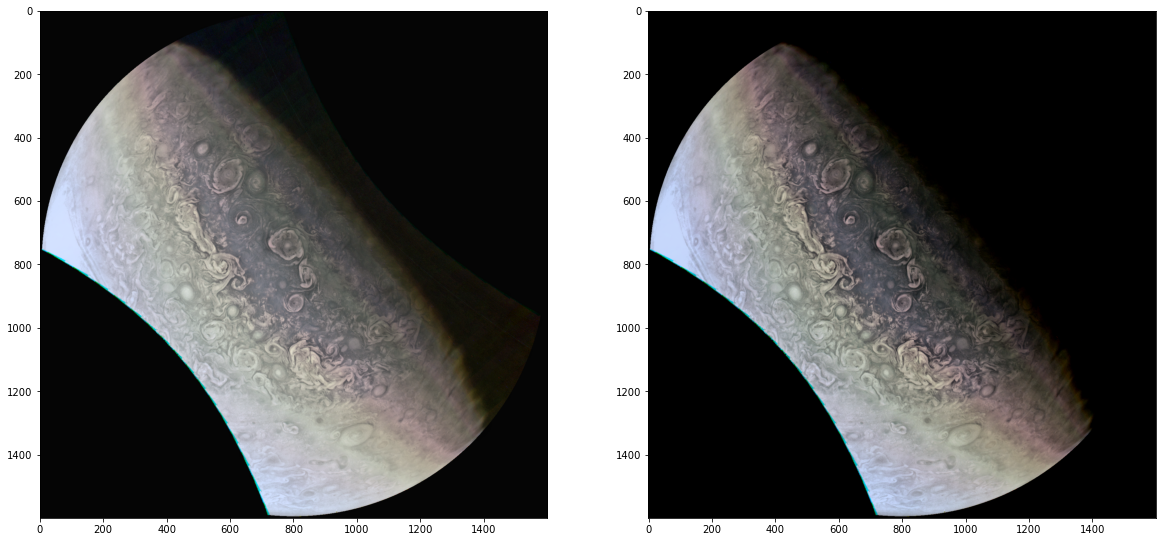

In [8]:
alpha = 1.2
beta = -55

new_image = cv2.addWeighted(clahe_img, alpha, np.zeros(clahe_img.shape, clahe_img.dtype),0,beta)
new1 = cv2.cvtColor(new_image, cv2.COLOR_RGB2BGR)
#cv2.imwrite(r'13550-ImageSet/resultadoproceso4.2.png', new1)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(clahe_img)

plt.subplot(1,2,2)
plt.imshow(new_image)

optional we can create a caricature with the final result

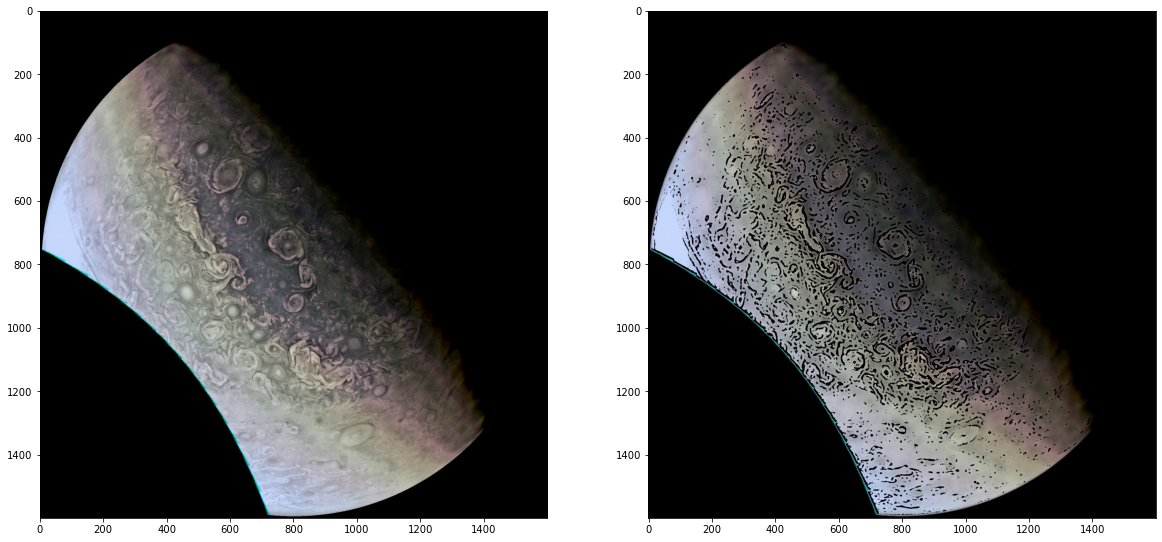

In [9]:
DOWNSAMPLING_UPSAMPLING_STEPS = 2
BILATERAL_STEPS = 7
width, height = new_image.shape[:2]
copied_image = np.copy(new_image)
for _ in range(DOWNSAMPLING_UPSAMPLING_STEPS):
    copied_image = cv2.pyrDown(copied_image)
for _ in range(BILATERAL_STEPS):
    copied_image = cv2.bilateralFilter(copied_image, d=9, sigmaColor=.1, sigmaSpace=.01)
for _ in range(DOWNSAMPLING_UPSAMPLING_STEPS):
    copied_image = cv2.pyrUp(copied_image)
gray = cv2.cvtColor(new_image, cv2.COLOR_RGB2GRAY)
blur = cv2.medianBlur(gray, 7)
edges = cv2.adaptiveThreshold((255 * blur).astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,
                              blockSize=11, C=4)
edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
cartoonized_image = cv2.bitwise_and(copied_image, edges)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(new_image)

plt.subplot(1,2,2)
plt.imshow(cartoonized_image)